# Prosper Loan Data
## by Alec Yamana

## Preliminary Wrangling

> The chosen dataset is "Prosper Loan Data". This dataset contains information about loans, such as Credit Grade, Loan Status and other information from Prosper Funding LLC.

In [68]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [69]:
df = pd.read_csv('prosperLoanData.csv')

In [70]:
# Information of the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [71]:
# Preview of the dataset
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


### What is the structure of your dataset?

> The dataset contains 113937 and 81 columns about Loans.

### What is/are the main feature(s) of interest in your dataset?

> My main interest with the dataset is understanding which features are related with the performance of the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  My main features will be 'EstimatedReturn','LoanOriginalAmount','StatedMonthlyIncome','BorrowerAPR','ProsperRating (numeric)','ProsperRating (Alpha)' and 'EmploymentStatus'.

As EstimatedReturnwill be our main variable, we need to check which rows have non null values of this metric.


In [72]:
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

In [73]:
# drop null
df2 = df[~df.EstimatedReturn.isna()]

In [74]:
df2.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158


Only selecting the columns that we have interested analysing.

In [75]:
df3 = df2[['EstimatedReturn','LoanOriginalAmount','StatedMonthlyIncome','BorrowerAPR','ProsperRating (numeric)','ProsperRating (Alpha)','EmploymentStatus']]

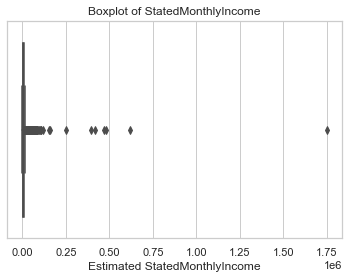

In [76]:
sb.boxplot(x=df3['StatedMonthlyIncome'])
plt.title('Boxplot of StatedMonthlyIncome')
plt.xlabel('Estimated StatedMonthlyIncome');

here we observe that are some realy high outliers in StatedMonthlyIncome. We will filter these rows because they can distorce some relationship ou correlation metrics.

In [77]:
# only StatedMonthlyIncome Above 70,000
StatedMonthlyIncome_outliers = df3.query('StatedMonthlyIncome > 70000')
StatedMonthlyIncome_outliers.count()


EstimatedReturn            39
LoanOriginalAmount         39
StatedMonthlyIncome        39
BorrowerAPR                39
ProsperRating (numeric)    39
ProsperRating (Alpha)      39
EmploymentStatus           39
dtype: int64

In [78]:
StatedMonthlyIncome_outliers

,EstimatedReturn,LoanOriginalAmount,StatedMonthlyIncome,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),EmploymentStatus
4691,0.06230,13000,7.500000e+04,0.12528,6.0,A,Employed
8066,0.10870,2000,4.166667e+05,0.35643,1.0,HR,Employed
13039,0.08580,10000,8.333333e+04,0.19236,5.0,B,Self-employed
17411,0.14870,7500,4.833333e+05,0.35643,2.0,E,Employed
20708,0.10030,15000,7.836442e+04,0.24758,4.0,C,Employed
27013,0.10740,15000,7.500000e+04,0.20200,5.0,B,Employed
28187,0.08529,9500,7.500000e+04,0.21290,4.0,C,Self-employed
28298,0.08027,15000,7.083333e+04,0.20347,4.0,C,Self-employed
29348,0.04950,15000,7.333333e+04,0.17493,5.0,B,Employed
35218,0.05450,1000,1.083333e+05,0.07389,7.0,AA,Full-time


In [79]:
df4 = df3.query('StatedMonthlyIncome < 70000')

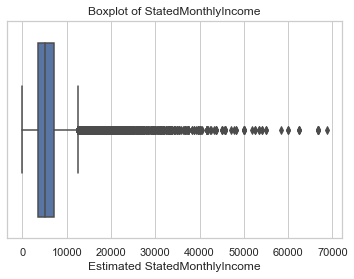

In [80]:
sb.boxplot(x=df4['StatedMonthlyIncome'])
plt.title('Boxplot of StatedMonthlyIncome')
plt.xlabel('Estimated StatedMonthlyIncome');

In [81]:
df4.to_csv('final_df_prosper_loan_data')

# Univariate Exploration


> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Univariate exploration of EstimatedReturn

> The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated
Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.


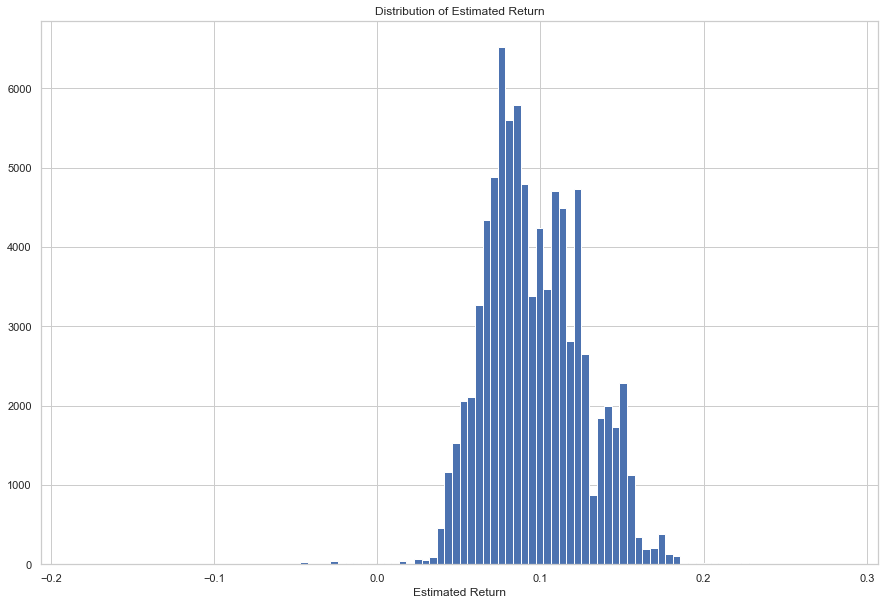

In [82]:
plt.figure(figsize=(15,10))
plt.hist(df4['EstimatedReturn'], bins=100)
plt.title('Distribution of Estimated Return')
plt.xlabel('Estimated Return');

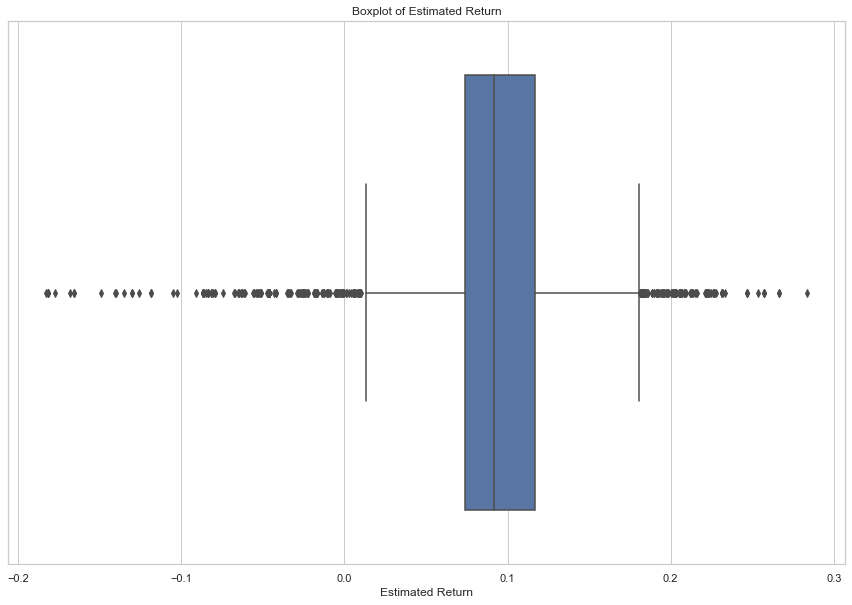

In [83]:
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")

ax = sb.boxplot(x=df4["EstimatedReturn"])

plt.title('Boxplot of Estimated Return')
plt.xlabel('Estimated Return');

We can observe that Estimated return of loans are within -0.1 and 0.25. Thee are two peaks of returns, one under 0.1 and other above 0.1 and our data looks like it's right skewed. Also there are many outliers and loan median Estimated value is aprox. 0.08.

### Univariate exploration of LoanOriginalAmount

> The origination amount of the loan.



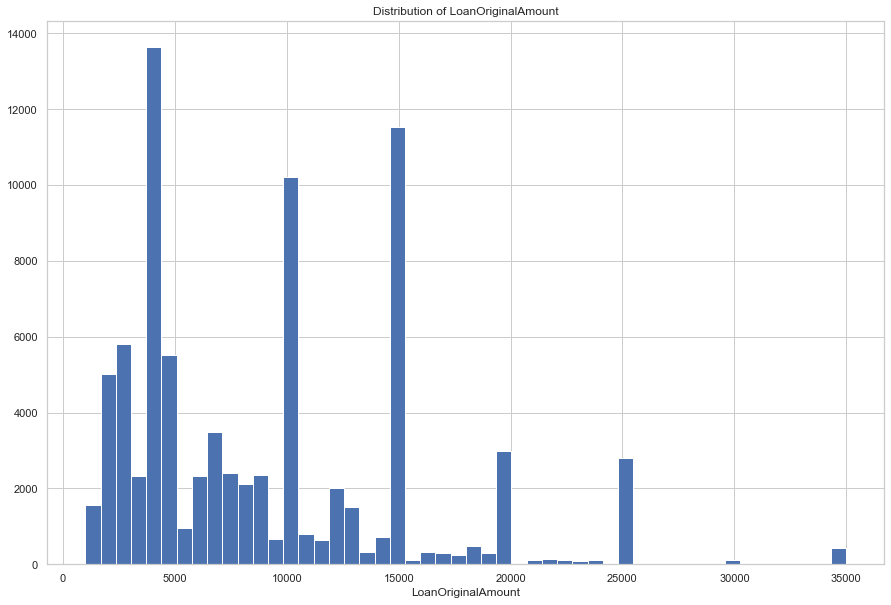

In [84]:
plt.figure(figsize=(15,10))
plt.hist(df4['LoanOriginalAmount'], bins=50)
plt.title('Distribution of LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount');

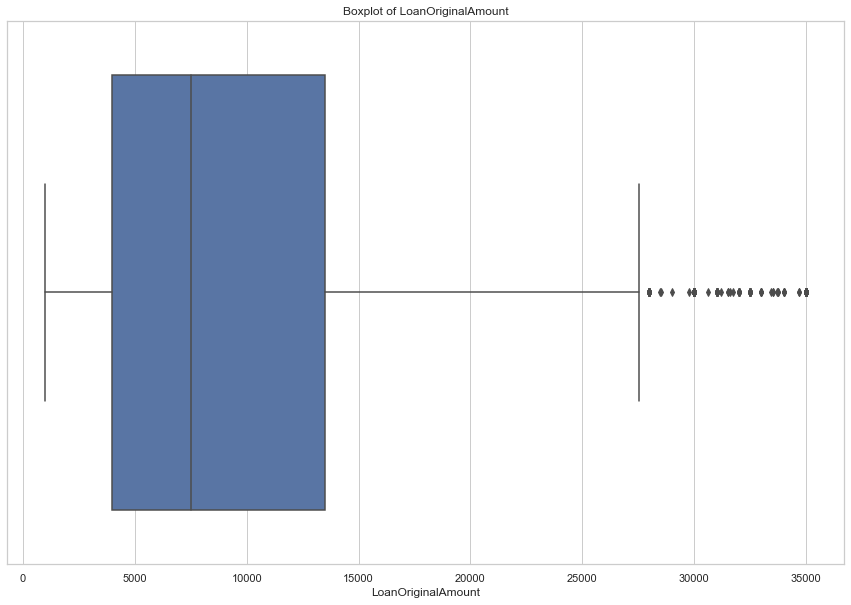

In [85]:
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")
ax = sb.boxplot(x=df4["LoanOriginalAmount"])
plt.title('Boxplot of LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount');

It´s interisting to notice that Loan amount has peaks around 5000 multiples. The median value is aprox. 7500 and there are outliers above 28000.

### Univariate exploration of StatedMonthlyIncome

> The monthly income the borrower stated at the time the listing was created.



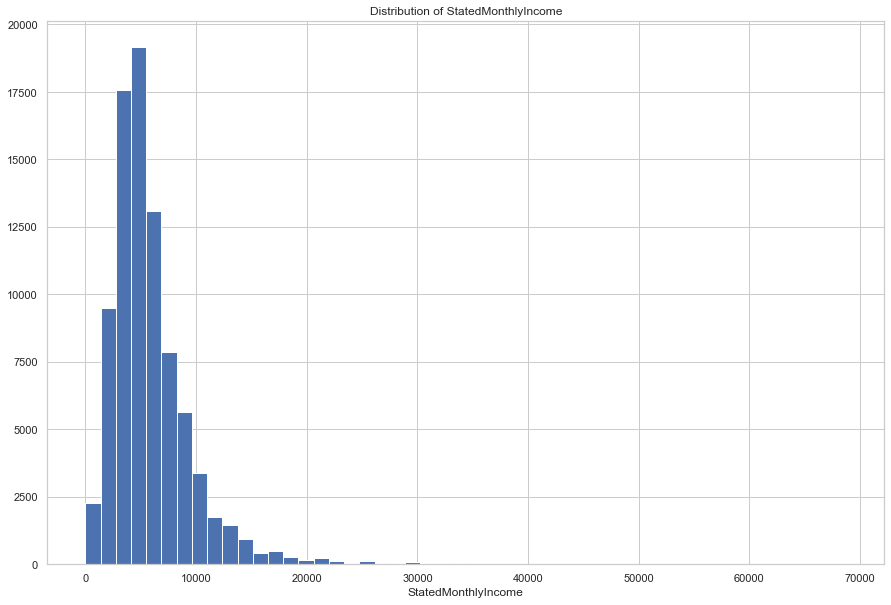

In [86]:
plt.figure(figsize=(15,10))
plt.hist(df4['StatedMonthlyIncome'], bins = 50);

plt.title('Distribution of StatedMonthlyIncome')
plt.xlabel('StatedMonthlyIncome');

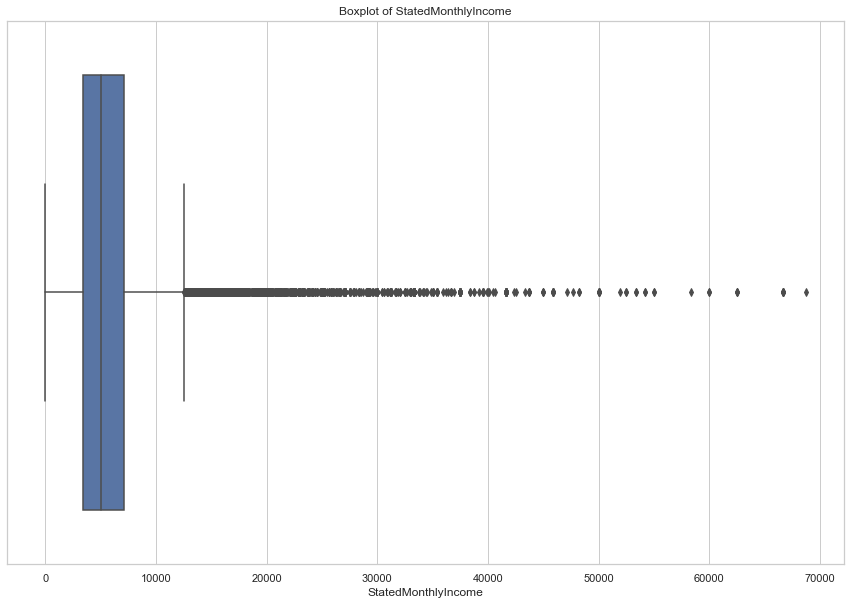

In [87]:
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")
ax = sb.boxplot(x=df4["StatedMonthlyIncome"])
plt.title('Boxplot of StatedMonthlyIncome')
plt.xlabel('StatedMonthlyIncome');

There are some outliers with StatedMonthlyIncome realy high, above 70000, that may . Selecting only loans with StatedMonthlyIncome under 30000, the median is 5000.

### Univariate exploration of BorrowerAPR

> The Borrower's Annual Percentage Rate (APR) for the loan.

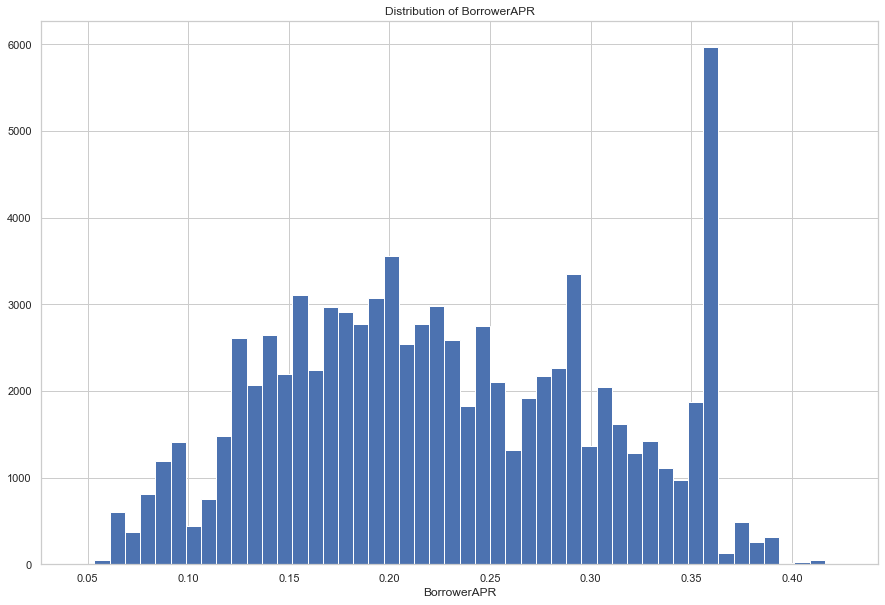

In [88]:
plt.figure(figsize=(15,10))
plt.hist(df4['BorrowerAPR'], bins = 50)
plt.title('Distribution of BorrowerAPR')
plt.xlabel('BorrowerAPR');

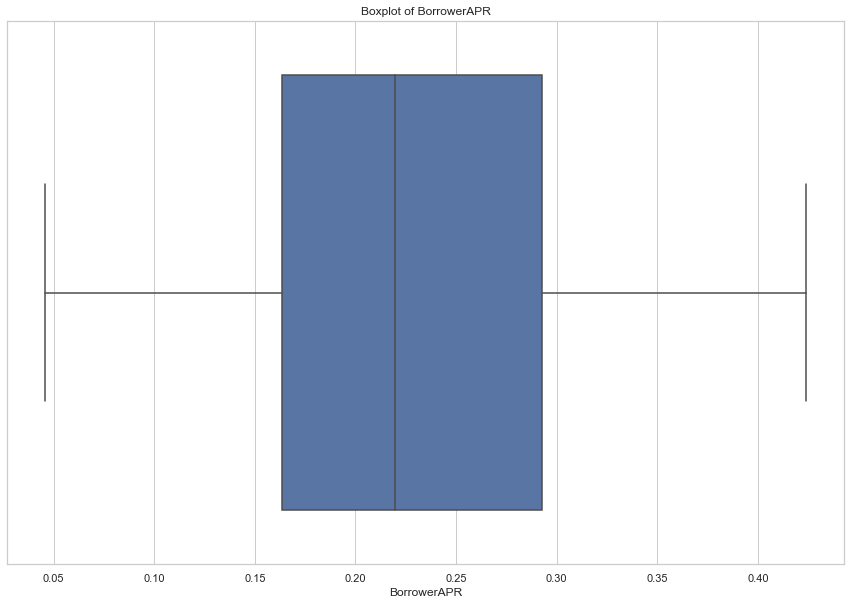

In [56]:
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")

ax = sb.boxplot(x=df4['BorrowerAPR'])
plt.title('Boxplot of BorrowerAPR')
plt.xlabel('BorrowerAPR');

BorrowerApr has tome peaks, specially in 0.37. The median is around 0.22 and values range from under 0.05 to 0.41.

### Univariate exploration of ProsperRating numeric and Alpha

> numeric: The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable
for loans originated after July 2009.

> Alpha: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.


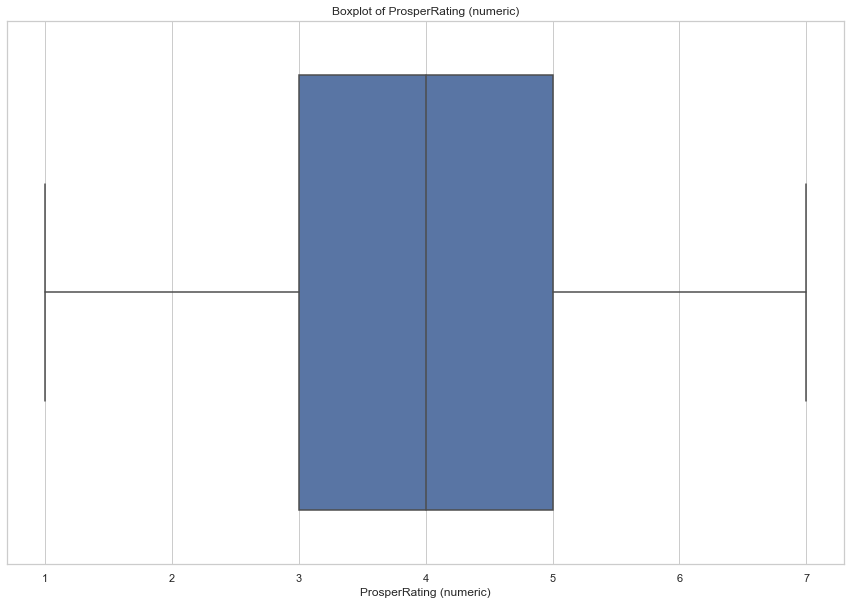

In [57]:
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")
ax = sb.boxplot(x=df4['ProsperRating (numeric)'])
plt.title('Boxplot of ProsperRating (numeric)')
plt.xlabel('ProsperRating (numeric)');

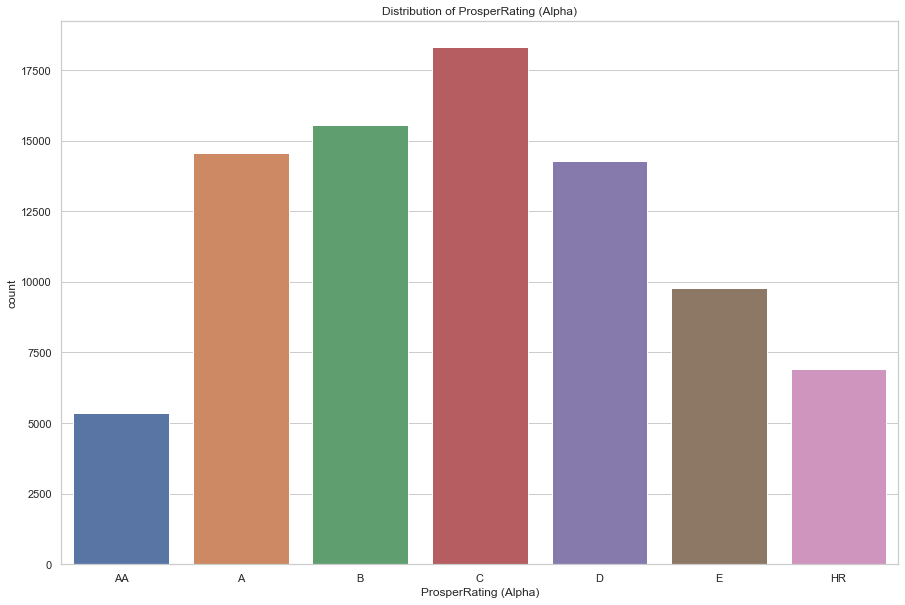

In [96]:
ratings_ordered = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")
sb.countplot(data = df4, x = 'ProsperRating (Alpha)', order = ratings_ordered)
plt.title('Distribution of ProsperRating (Alpha)');

We observe that ProsperRating rates are centered in 4/C and has a normal distribution.

### Univariate exploration of EmploymentStatus

> The employment status of the borrower at the time they posted the listing.


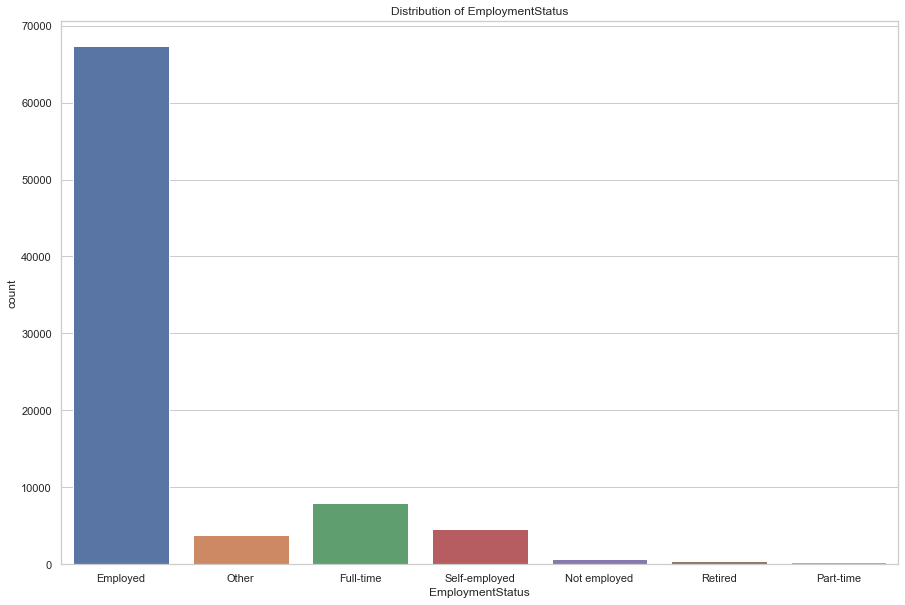

In [97]:
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")
sb.countplot(data = df4, x = 'EmploymentStatus')
plt.title('Distribution of EmploymentStatus');

Most of the borrowers are employed, full-time or Self-employed. 

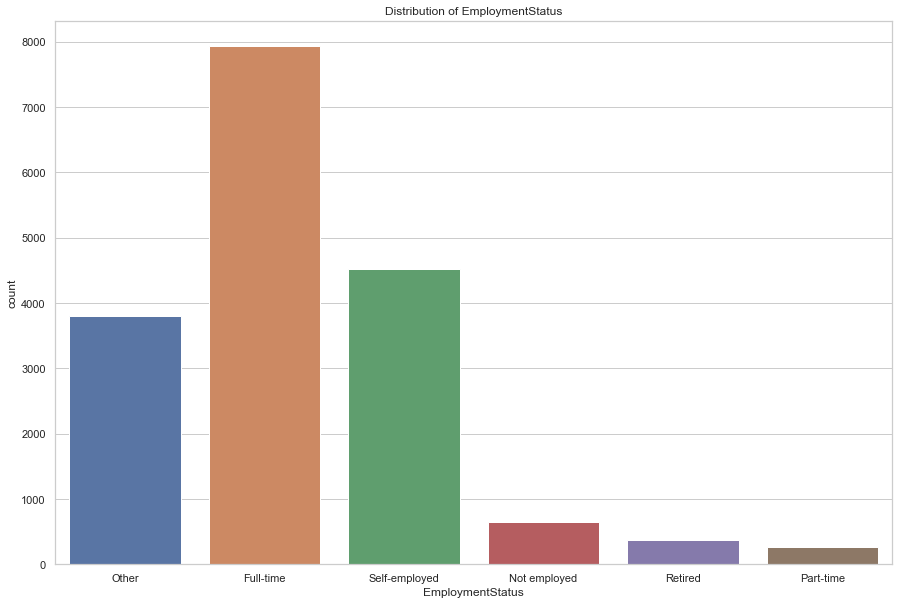

In [98]:
plt.figure(figsize=(15,10))
sb.set_theme(style="whitegrid")
sb.countplot(data = df4.query('EmploymentStatus != "Employed"'), x = 'EmploymentStatus')
plt.title('Distribution of EmploymentStatus');

Full-time, Other and Self-employed are the most relevant status besides Employed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In overall, the distributions look fine, having a central point with some outliers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes. For StatedMonthlyIncome, I filtered only values under 70000. There are 39 rows that could distorce some relationship metrics.

# Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).



Initially, it's interisting to evaluate the correlation between the variables.

In [99]:
numeric_variables = ['EstimatedReturn','LoanOriginalAmount','StatedMonthlyIncome','BorrowerAPR','ProsperRating (numeric)']

### Heatmap with correlation within numerical variables.

> Matrix with the correlationship coeficient between two variables (one in the x axis, other in the y axis).


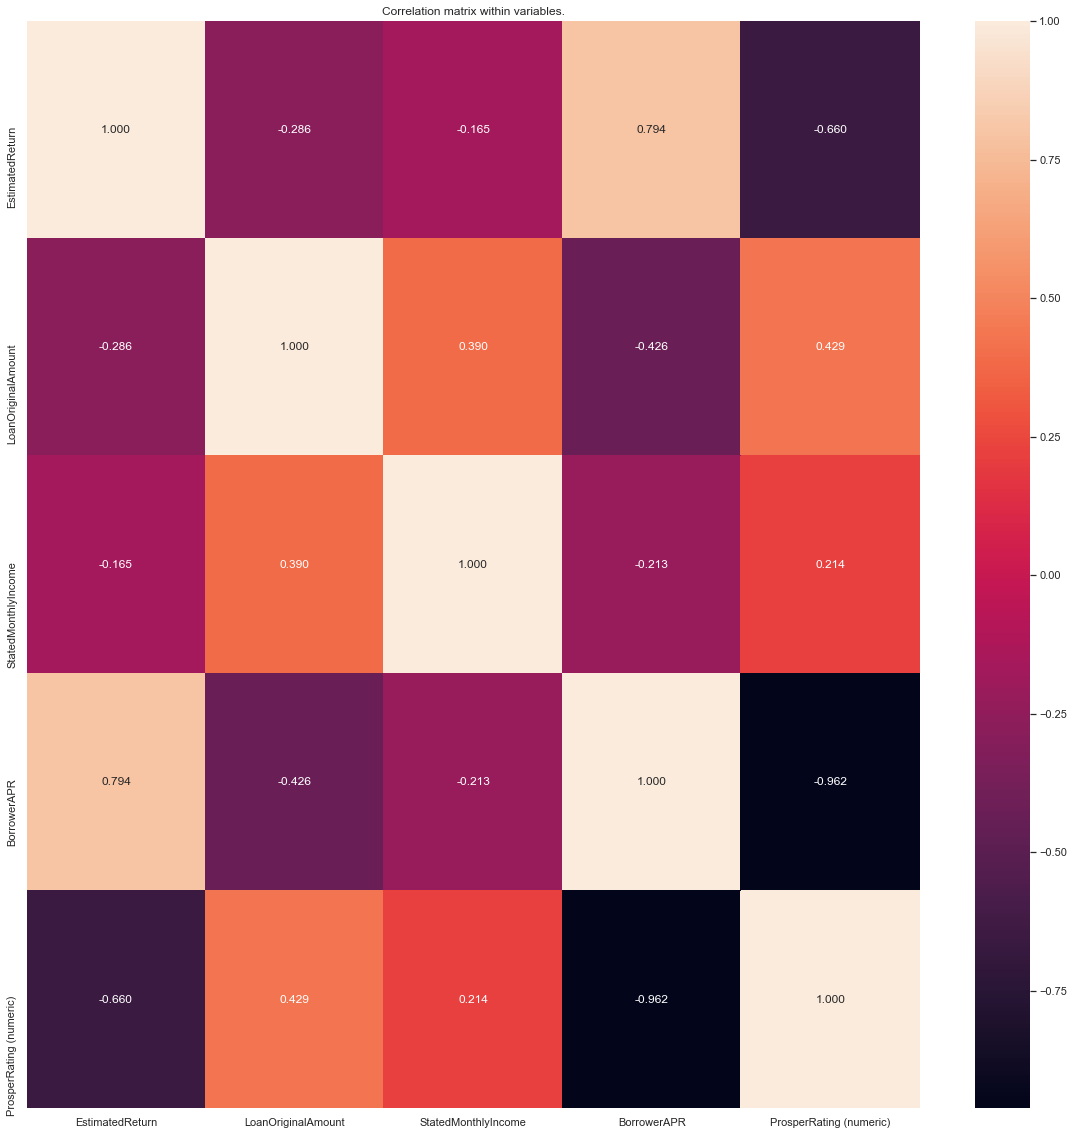

In [100]:
# correlation plot
plt.figure(figsize=(20,20))
sb.heatmap(df4[numeric_variables].corr(), annot = True, fmt = '.3f',);
plt.title('Correlation matrix within variables.');

There some interesting correlation within some variables:
- Estimated Return and BorrowerAPR have a high correlation.
- By other hand, LoanOriginalAmount, StatedMonthlyIncome and ProsperRating have negative correlationship.
- StatedMonthlyIncome has a low correlationship within the other variables.
- BorrowerAPR and ProsperRating have a high negative correlationship.

<Figure size 1440x1440 with 0 Axes>

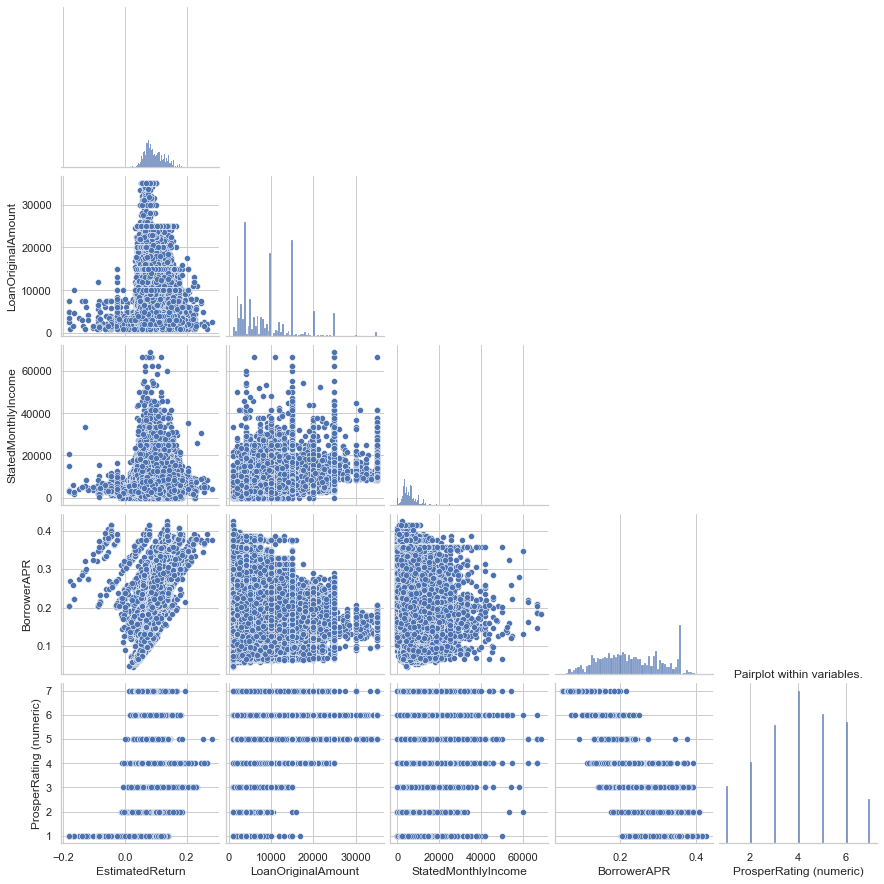

In [101]:
plt.figure(figsize=(20,20))
sb.pairplot(df4[numeric_variables],  corner=True)
plt.title('Pairplot within variables.');

There some interesting correlation within some variables:
- Here we can clearly observe the positive relationship within EstimatedReturn and BorrowerAPR and ProsperRating.


EmploymentStatus,Employed,Full-time,Not employed,Other,Part-time,Retired,Self-employed
ProsperRating (numeric),,,,,,,
1.0,4607,893,201,491,32,53,654
2.0,7400,926,130,582,46,50,656
3.0,11003,1533,132,714,55,86,748
4.0,14997,1288,82,868,30,54,1014
5.0,13499,681,53,600,22,39,678
6.0,11626,1739,46,425,55,56,601
7.0,4155,865,5,126,16,29,173


<Figure size 1440x1440 with 0 Axes>

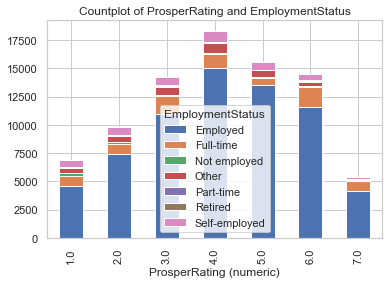

In [102]:
x_axis = 'EmploymentStatus'
hue_break = 'ProsperRating (numeric)'


df_plot = df4.groupby([x_axis, hue_break ]).size().reset_index().pivot(columns=x_axis, index=hue_break, values=0)

display(df_plot)
plt.figure(figsize=(20,20))
df_plot.plot(kind='bar', stacked=True)
plt.title('Countplot of ProsperRating and EmploymentStatus');

There are some even distribution of Employed and Full-time across Prosper Rating.
However we can observe Not employed appearing more in low ratings.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> EstimatedReturn have a high correlation with BorrowerAPR, probably high BorrowerAPR people gives a high return of the investment. However, StatedMonthlyIncome, LoanOriginalAmount and ProsperRating have a negative correlation, what is unexpected. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> ProsperRating and BorrowerAPR have a extremely high negative correlation. This explain why ProsperRating and EstimatedReturn have a negative correlationship.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Scatterplot of Features by EmploymentStatus

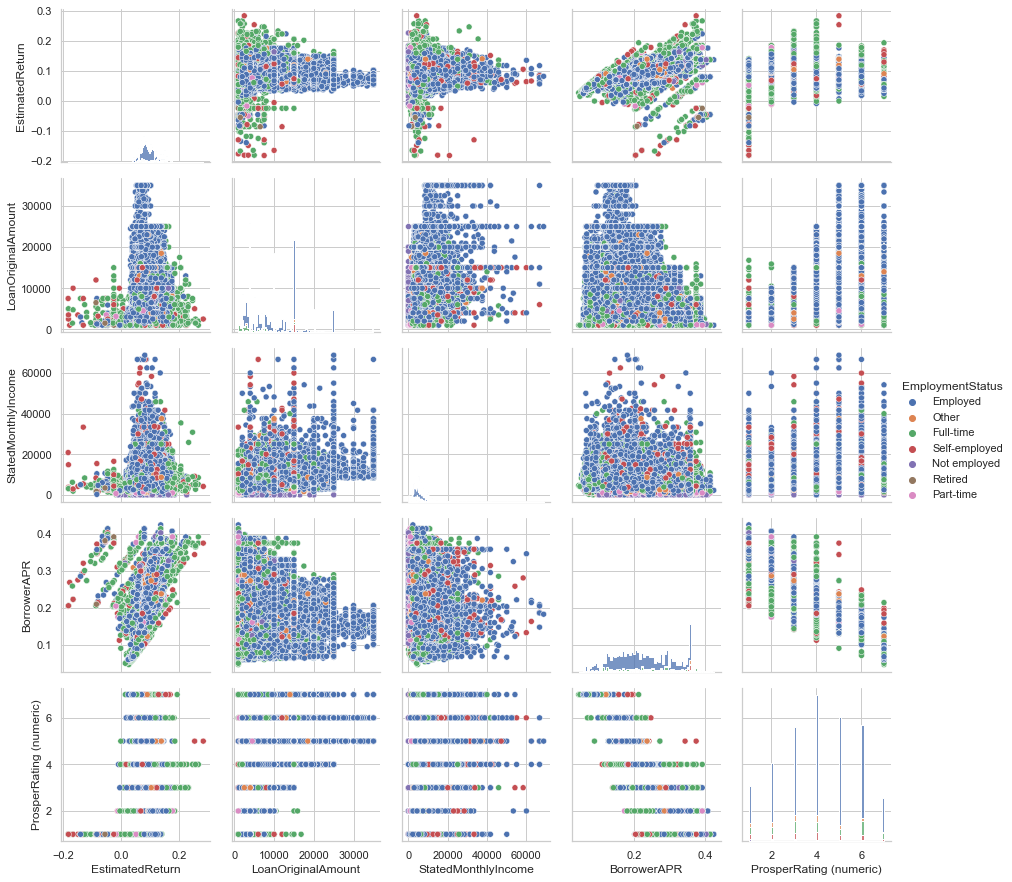

In [104]:
g = sb.PairGrid(df4[['EstimatedReturn','LoanOriginalAmount','StatedMonthlyIncome','BorrowerAPR','ProsperRating (numeric)','EmploymentStatus']], hue="EmploymentStatus")
g.map_diag(sb.histplot, multiple="stack", element="step")
g.map_offdiag(sb.scatterplot)
g.add_legend();

By the facegrit above, there is no clear relationship within EmploymentStatus and the other metrics.
As Employed is the most common status, we will remove this status to evaluate other statuses more clearly

## Scatterplot of Features by EmploymentStatus removing "Employed" status

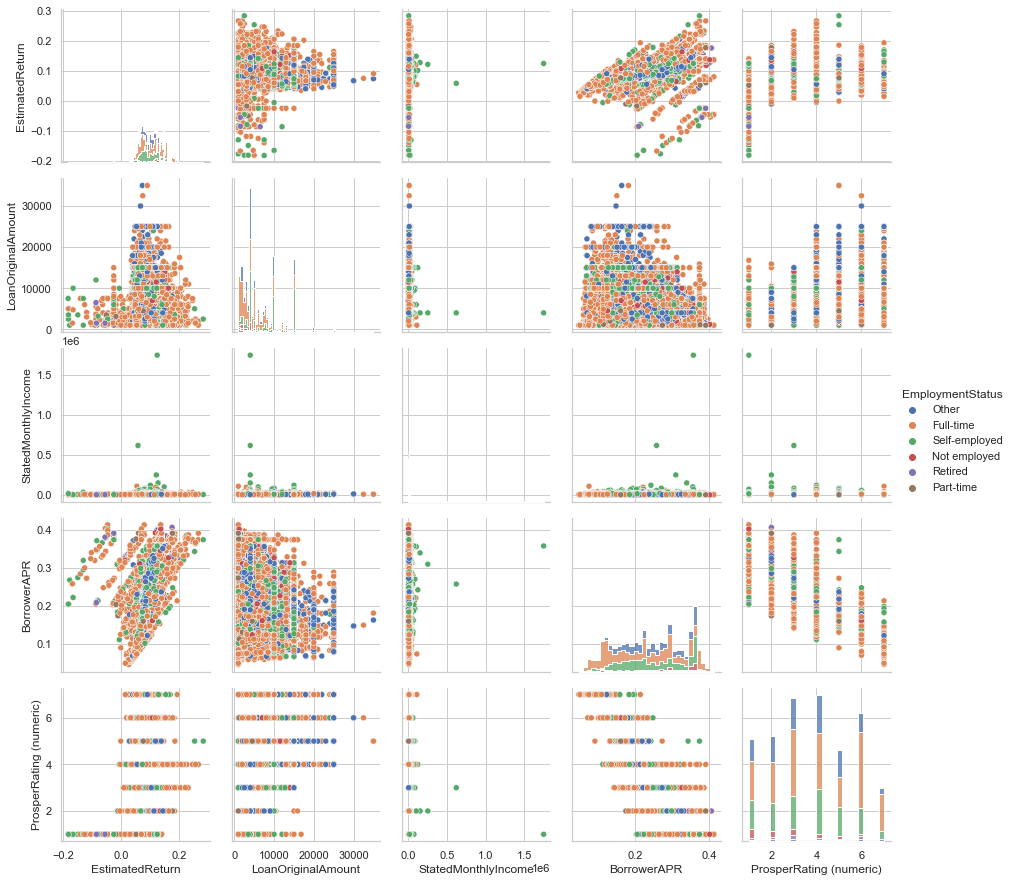

In [92]:
dfaux = df2[df2.EmploymentStatus!="Employed"]

g = sb.PairGrid(dfaux[['EstimatedReturn','LoanOriginalAmount','StatedMonthlyIncome','BorrowerAPR','ProsperRating (numeric)','EmploymentStatus']], hue="EmploymentStatus")
g.map_diag(sb.histplot, multiple="stack", element="step")
g.map_offdiag(sb.scatterplot)
g.add_legend();

There is no clear relationship within EmpoymentStatus and the numeric metrics. 

## Regression plot of Estimated Return and BorrowerAPR by EmploymentStatus

<Figure size 1440x1440 with 0 Axes>

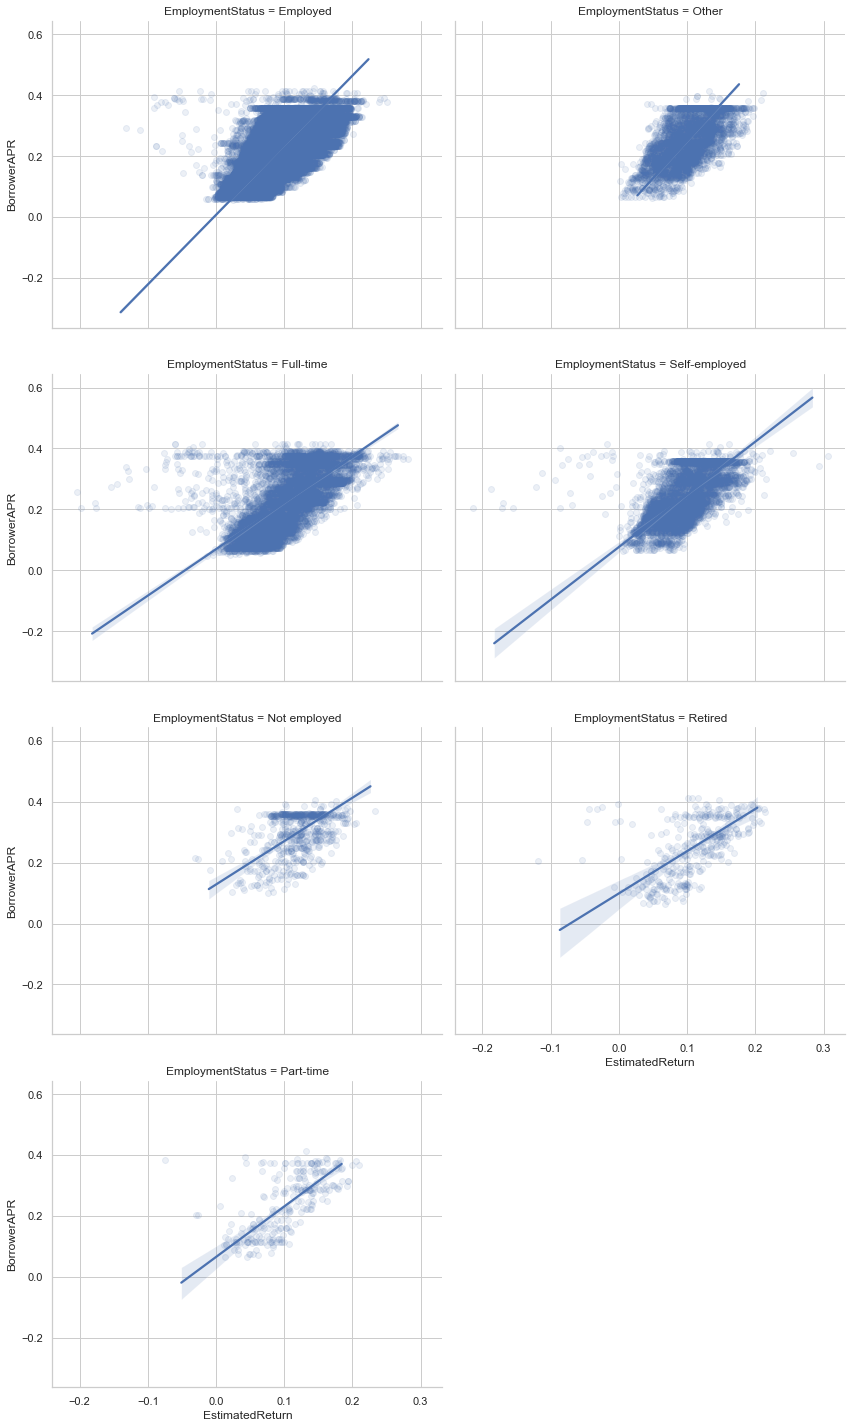

In [105]:
plt.figure(figsize=(20,20))
g=sb.FacetGrid(data=df4, aspect=1.2, height=5, col='EmploymentStatus', col_wrap=2)
g.map(sb.regplot, 'EstimatedReturn', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});


With these regressionplots we observe that for all EmploymentStatus BorrowerAPR and EstimatedReturn have a positive correlation. 

For Full-time and SelfEmployed status we observe a wide spread of EstimatedReturn values and the remaining status there is a narrower spread of EstimatedReturn or BorrowerAPR values.

## Regression plot of Estimated Return and BorrowerAPR by Propsper Rating

<Figure size 1440x1440 with 0 Axes>

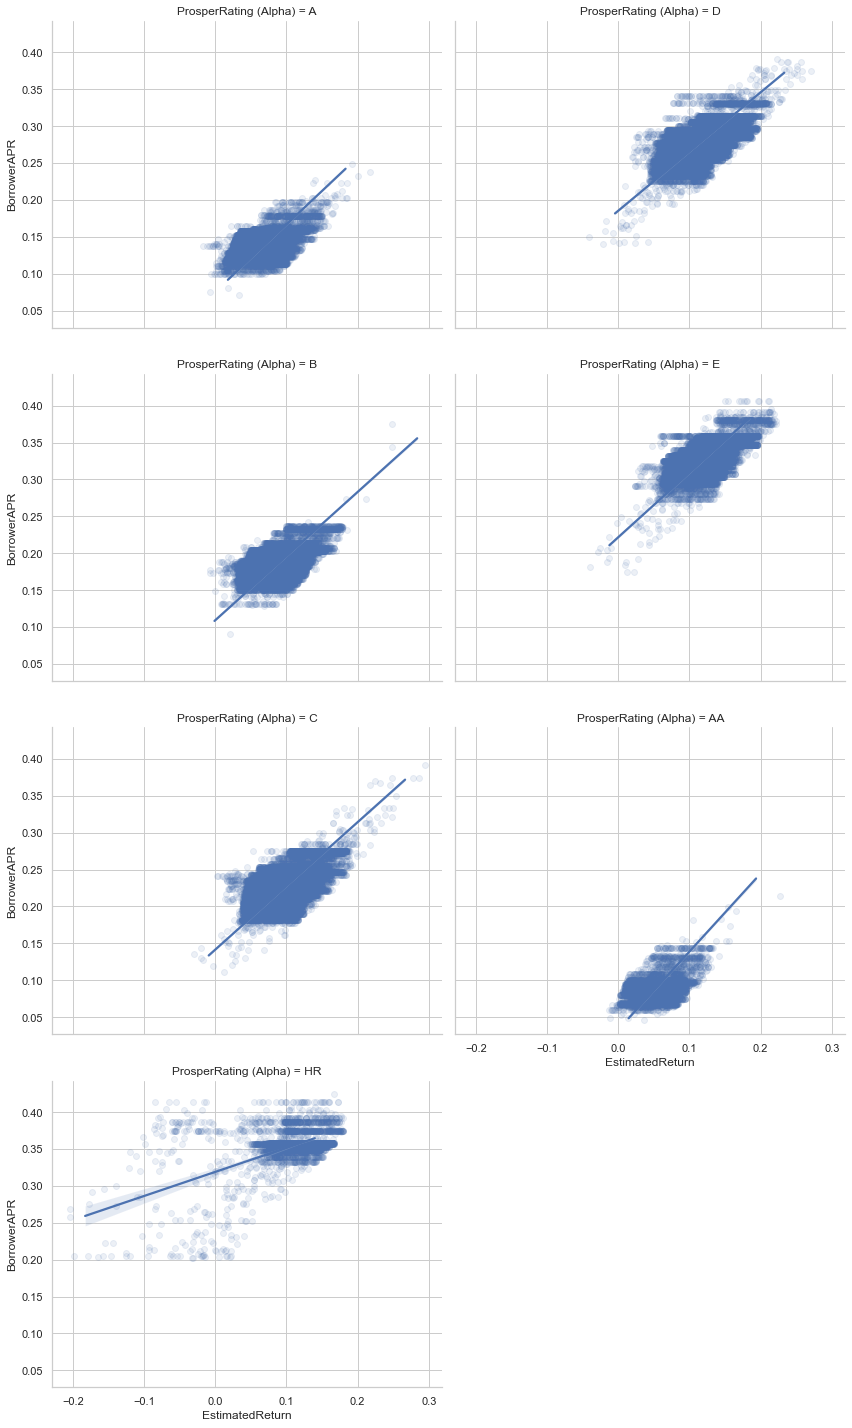

In [94]:
plt.figure(figsize=(20,20))
g=sb.FacetGrid(data=df4, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=2)
g.map(sb.regplot, 'EstimatedReturn', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});


We can observe that ProsperRating 1 has a wide spread of EstimatedReturn and BorrowerAPR values. While for other Ratings, spread of values is more narrower.

## Average Estimated Return by EmployedStatus and ProsperRating

<Figure size 1440x1440 with 0 Axes>

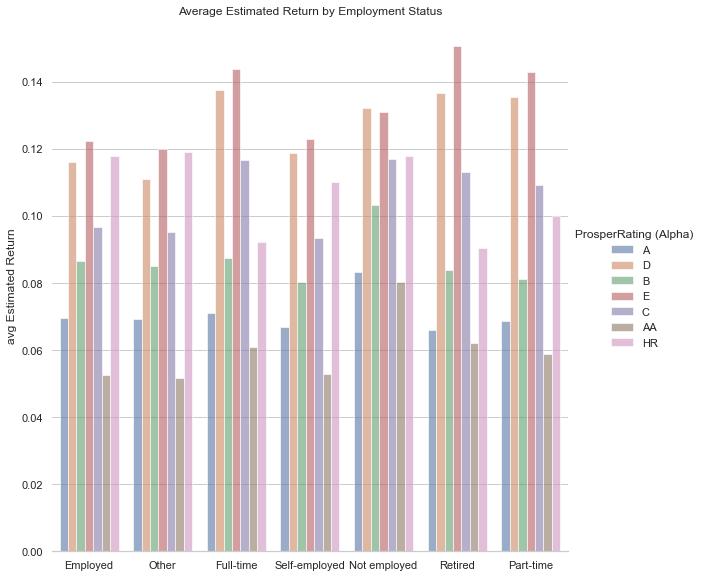

In [106]:
plt.figure(figsize=(20,20))
g = sb.catplot(
    data=df4, kind="bar",
    x="EmploymentStatus", y="EstimatedReturn", hue = 'ProsperRating (Alpha)', 
    ci=None, alpha=.6, height=8
)
g.despine(left=True)
g.set_axis_labels("", "avg Estimated Return")

plt.title("Average Estimated Return by Employment Status");

Here we observe that for almost all EmploymentStatus, EstimatedReturn decreases as the ProsperRating Increases. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> EstimatedReturn has a positive correlation with BorrowerAPR. Also, as the ProsperRating Increases, the Estimated Return decreases.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My investigation focused on the relationship between EstimatedReturn and other features. The bivariate exploration showed that EstimatedReturn increases as BorrowerAPR increases. Also, it showed that for the other features, EstimatedReturn decreases as BorrowerAPR increases. 

### Were there any interesting or surprising interactions between features?

> Yes, the negative correlation within EstimatedReturn and ProsperRating. I though that more prosper the person is, higher the Estimated Return.